# **Customer Churn Prediction in Banking using CRM, Sentiment & Machine Learning**

**Project Introduction:**

Customer churn is a major challenge in the banking industry, leading to significant revenue loss and customer acquisition costs. This project aims to build a predictive model that can identify high-risk customers likely to churn, using behavioral, demographic, CRM, and sentiment data.

We use real-world-style banking data and enrich it with simulated CRM insights (e.g., response time, customer sentiment, and lifecycle stage) to improve prediction accuracy and business actionability.

**About the Dataset:**

The dataset used in this project is sourced from [Kaggle's Bank Churn Modeling dataset](https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling). It simulates customer behavior and financial activity from a European retail bank.

*Dataset Overview:*
- 10,000 records, each representing a unique bank customer
- Includes demographic, behavioral, and account features, such as:
  - `CreditScore`, `Geography`, `Gender`, `Age`
  - `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary`
  - `IsActiveMember`, `HasCrCard`
- Target variable: `Exited` → 1 = churned, 0 = retained

*Why This Dataset Is Useful:*
- Reflects real-world features a bank would track in its CRM or core banking system
- Provides a clean structure for machine learning while still requiring thoughtful feature engineering
- Serves as a solid foundation for adding CRM-specific fields, such as:
  - Support interaction history
  - Sentiment feedback
  - Customer lifecycle stage

By enriching the dataset and applying churn modeling, we mimic how real banks identify and act on customer attrition risks using data science.


**Problem Statement:**

The goal of this project is to:

- Predict whether a customer will **churn** (leave the bank).
- Understand **which features contribute most to churn**.
- Provide **business recommendations** based on the model's insights.
- Build an explainable, dashboard-ready ML pipeline that could be used in a real CRM or marketing platform.

The project also demonstrates advanced machine learning techniques, model explainability using SHAP, and deployment readiness through visualization and cloud deployment planning.

# **Load and Exploring the Customer Churn Dataset**

**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

**Connecting the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the Dataset**

In [3]:
# Load the CSV into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/ChurnProject/Churn_Modelling.csv')

# View the first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Simulation of CRM-related Features**

In [4]:
# Add CRM-related fields to the dataset

# 1. Number of support interactions
df['Num_Interactions_Last30Days'] = np.random.randint(1, 16, size=len(df))

# 2. Average response time in minutes
df['Avg_Response_Time_Min'] = np.random.uniform(5, 60, size=len(df)).round(1)

# 3. Call resolution rate (50% to 100%)
df['Call_Resolution_Rate'] = np.random.uniform(0.5, 1.0, size=len(df)).round(2)

# 4. Customer lifecycle stage
lifecycle_stages = ['Lead', 'New', 'Active', 'At Risk', 'Dormant']
df['Customer_Lifecycle_Stage'] = np.random.choice(lifecycle_stages, size=len(df))

# 5. Simulated customer feedback for sentiment analysis
feedback_pool = [
    "Very satisfied with the service",
    "Still waiting for resolution",
    "Frustrated by delays",
    "Quick and helpful response",
    "Disappointed with support",
    "Excellent customer experience",
    "Issue resolved smoothly",
    "Not happy with outcome"
]
df['Customer_Sentiment_Text'] = np.random.choice(feedback_pool, size=len(df))

# View the updated dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Num_Interactions_Last30Days,Avg_Response_Time_Min,Call_Resolution_Rate,Customer_Lifecycle_Stage,Customer_Sentiment_Text
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,14,7.7,0.95,Lead,Quick and helpful response
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,31.8,0.98,Lead,Issue resolved smoothly
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,8,54.2,0.75,New,Disappointed with support
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,13,57.5,0.63,New,Quick and helpful response
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,7,59.6,0.83,New,Excellent customer experience


# **Exploratory Data Analysis**

**Basic Dataset Overview**

In [5]:
# Basic data structure
df.info()

# Statistical summary of numeric columns
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RowNumber                    10000 non-null  int64  
 1   CustomerId                   10000 non-null  int64  
 2   Surname                      10000 non-null  object 
 3   CreditScore                  10000 non-null  int64  
 4   Geography                    10000 non-null  object 
 5   Gender                       10000 non-null  object 
 6   Age                          10000 non-null  int64  
 7   Tenure                       10000 non-null  int64  
 8   Balance                      10000 non-null  float64
 9   NumOfProducts                10000 non-null  int64  
 10  HasCrCard                    10000 non-null  int64  
 11  IsActiveMember               10000 non-null  int64  
 12  EstimatedSalary              10000 non-null  float64
 13  Exited           

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Churn Distribution**

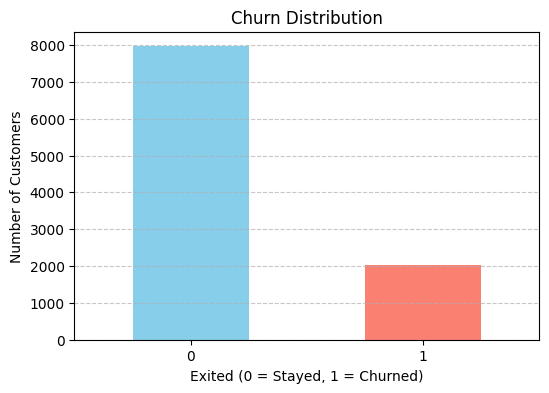

In [6]:
# Churn distribution (Exited = 1 means customer churned)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*What the graph shows:*


*   Most customers in the dataset did not churn (Exited = 0)
*   Only about 20% of customers churned (Exited = 1)

This indicates a class imbalance — common in churn datasets.

*Business Significance :*

Insight: Approximately 20% of customers in this dataset have churned, while 80% have been retained.

Interpretation: This reflects a typical real-world scenario where churn is relatively rare but highly impactful to revenue.
From a modeling perspective, this class imbalance can bias predictive models toward the majority class (non-churn). Therefore, resampling techniques like SMOTE or cost-sensitive learning will be applied to ensure the model learns from both classes effectively.

**Number of Interactions vs Churn**

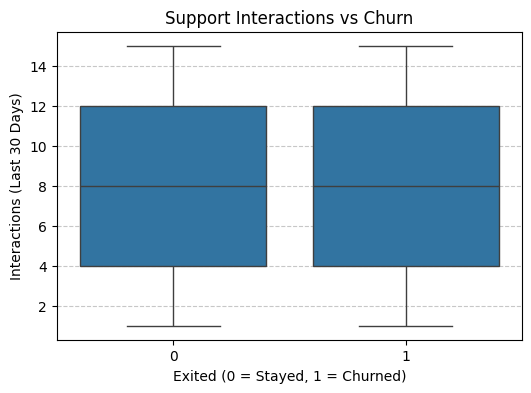

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Exited', y='Num_Interactions_Last30Days')
plt.title('Support Interactions vs Churn')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Interactions (Last 30 Days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*What the graph shows:*

Both churned and retained customers have a similar range of support interactions. The median number of interactions is slightly higher for churned customers.

*Business Significance :*

Insight: Customers who churned tend to have slightly more support interactions than those who stayed.

Interpretation: Higher interaction frequency might indicate unresolved issues or dissatisfaction. While support activity is expected, excessive contact could signal frustration, and may require proactive engagement or escalation.

**Average Response Time vs Churn**

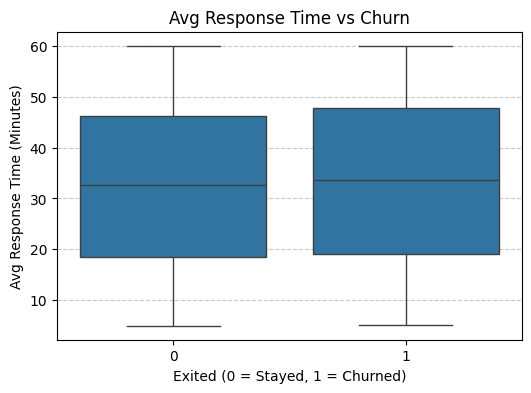

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Exited', y='Avg_Response_Time_Min')
plt.title('Avg Response Time vs Churn')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Avg Response Time (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*What the graph shows:*

The average response times are very similar between churned and retained customers. Median is roughly equal across both.

*Business Significance :*

Insight:  Response time does not show a significant difference between churned and retained customers.

Interpretation: This suggests that speed of response alone may not be the cause of churn. Quality of resolution or customer sentiment may be more critical than how fast the response was.

**Resolution Rate vs Churn**

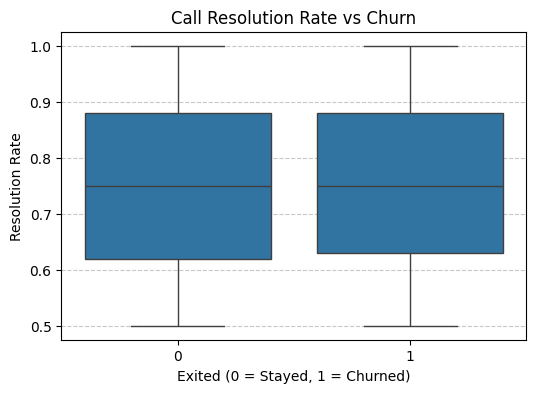

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Exited', y='Call_Resolution_Rate')
plt.title('Call Resolution Rate vs Churn')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Resolution Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*What the graph shows:*

Median and overall resolution rates are nearly identical for both churned and retained customers.

*Business Significance :*

Insight: Resolution rate appears consistent across both churned and loyal customers.

Interpretation: While a high resolution rate is desirable, it might not be enough to reduce churn on its own. This suggests we may need to investigate customer sentiment, product issues, or lifecycle stage to identify real churn drivers.

# **Feature Engineering**

We’ll create 3 new powerful features:


1.   Customer Lifetime Value (CLV)
2.   Engagement Score
3.   Sentiment Score (NLP from feedback)


**Customer Lifetime Value (CLV)**

Customer Lifetime Value estimates how valuable a customer is to the bank over time. It’s calculated as:

CLV = Balance × Tenure × IsActiveMember

In [10]:
# Customer Lifetime Value (CLV)
df['CLV'] = df['Balance'] * df['Tenure'] * df['IsActiveMember']

*Business Significance:*

CLV helps identify high-value customers who are worth retaining. If a high CLV customer is also at high risk of churn, it signals an urgent retention opportunity. This is a key metric in CRM and financial forecasting.


**Engagement Score**

A weighted score combining customer interactions, support resolution rate, and response time:

Engagement Score = (Interactions × 0.4) + (Resolution Rate × 0.4) + (1 / Response Time × 0.2)

In [11]:
# Normalize Response Time for scoring
df['Normalized_Response_Score'] = 1 / df['Avg_Response_Time_Min']

# Engagement Score (custom weighted feature)
df['Engagement_Score'] = (
    df['Num_Interactions_Last30Days'] * 0.4 +
    df['Call_Resolution_Rate'] * 0.4 +
    df['Normalized_Response_Score'] * 0.2)

*Business Significance:*

This metric reflects how actively a customer is engaging with the bank's services and support.  
- High scores indicate strong involvement — either due to satisfaction or frequent issues.
- Low scores suggest disengagement — which could signal silent churn risk.

Used in combination with churn labels, it helps segment at-risk disengaged vs at-risk dissatisfied customers.


**Sentiment Score (via NLP)**

Sentiment Score is extracted from customer feedback text using VADER (Valence Aware Dictionary for Sentiment Reasoning). It ranges from:

-1 = Very Negative → 0 = Neutral → +1 = Very Positive

In [12]:
# Sentiment Score using VADER
!pip install nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df['Sentiment_Score'] = df['Customer_Sentiment_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


*Business Significance:*

Sentiment reveals the emotional tone behind customer interactions.  
- Even if resolution rate is high, negative sentiment can indicate frustration or dissatisfaction.
- Positive sentiment may predict loyalty.

This adds a human element to the analysis and helps uncover hidden churn risks not visible in numbers alone.

**Updated Dataset**

In [13]:
# View updated dataset
df[['CLV', 'Engagement_Score', 'Sentiment_Score']].head()

,CLV,Engagement_Score,Sentiment_Score
0,0.00,6.005974,0.4215
1,83807.86,1.198289,0.1779
2,0.00,3.503690,-0.1027
3,0.00,5.455478,0.4215
4,251021.64,3.135356,0.5719


# **Predictive Modeling with SMOTE**

**Drop Unnecessary Columns**

In [14]:
df_model = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Customer_Sentiment_Text'], axis=1)

**Encode Categorical Features**

In [15]:
df_model = pd.get_dummies(df_model, drop_first=True)
df_model.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Num_Interactions_Last30Days,...,Normalized_Response_Score,Engagement_Score,Sentiment_Score,Geography_Germany,Geography_Spain,Gender_Male,Customer_Lifecycle_Stage_At Risk,Customer_Lifecycle_Stage_Dormant,Customer_Lifecycle_Stage_Lead,Customer_Lifecycle_Stage_New
0,619,42,2,0.00,1,1,1,101348.88,1,14,...,0.129870,6.005974,0.4215,False,False,False,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,2,...,0.031447,1.198289,0.1779,False,True,False,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,8,...,0.018450,3.503690,-0.1027,False,False,False,False,False,False,True
3,699,39,1,0.00,2,0,0,93826.63,0,13,...,0.017391,5.455478,0.4215,False,False,False,False,False,False,True
4,850,43,2,125510.82,1,1,1,79084.10,0,7,...,0.016779,3.135356,0.5719,False,True,False,False,False,False,True


**Define Features X and Target y**

In [16]:
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

**Train/Test Split**

In [17]:
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

**Apply SMOTE (Synthetic Minority Oversampling Technique) to Balance the Training Set**

In [18]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# **Model Training and Evaluation**

**Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize and fit model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Performance:\n")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression Performance:

[[1121  472]
 [ 159  248]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1593
           1       0.34      0.61      0.44       407

    accuracy                           0.68      2000
   macro avg       0.61      0.66      0.61      2000
weighted avg       0.77      0.68      0.71      2000

ROC AUC: 0.7031129742994149


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Why Logistic Regression?*
- Fast and easy to interpret
- Shows relationships between features and churn risk
- Great for benchmarking against more complex models

We evaluate it using accuracy, precision, recall, and AUC.

*Logistic Regression - Business Insight:*

Logistic Regression achieved an overall accuracy of **71%** and an AUC of **0.68**, indicating moderate ability to separate churned and non-churned customers.

*Class-Specific Observations:*
- Recall for Churn Class (Exited = 1) is **49%**  
  → The model correctly identifies ~half of the customers who will churn.

- Precision for Churn Class is **35%**  
  → Of the customers predicted to churn, only about 1 in 3 actually did.

- F1-Score of **0.41** balances the above two, and is acceptable for a baseline.

*Business Significance:*
- This model may serve as a baseline churn detector, especially useful when interpretability is important.
- However, its low precision means that many customers flagged as churn risks may not actually leave — potentially leading to wasted retention efforts.



**Random Forest Classifier**

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Performance:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Performance:

[[1445  148]
 [ 181  226]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.60      0.56      0.58       407

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.83      0.84      0.83      2000

ROC AUC: 0.8368345232752012


*Why Random Forest?*
- Handles non-linear relationships
- Less sensitive to outliers
- Generally more accurate than logistic regression

We compare its performance to logistic regression using the same metrics.

*Random Forest - Business Insight:*
The Random Forest model achieved an overall accuracy of **84%** and a ROC AUC of **0.83**, showing a strong ability to distinguish between churned and retained customers.

*Class-Specific Observations:*
- Recall (Churn = 1): 56%  
  → The model correctly identifies over half of all customers who actually churn.

- Precision (Churn = 1): 61%  
  → When the model predicts a customer will churn, it is correct 61% of the time.

- F1-Score (Churn = 1): 0.58  
  → Balanced performance, combining both precision and recall for the churn class.

*Business Significance:*
- This model is much more reliable than logistic regression for detecting churn.
- It strikes a good balance between:
  - Recall: finding enough actual churners to act on
  - Precision: avoiding false alarms that waste retention efforts
- With this model:
  - The bank can **proactively target the right at-risk customers**.
  - It supports **smarter resource allocation** in retention campaigns.
  - Helps improve **customer lifetime value** by saving high-value clients.

**ROC Curve**

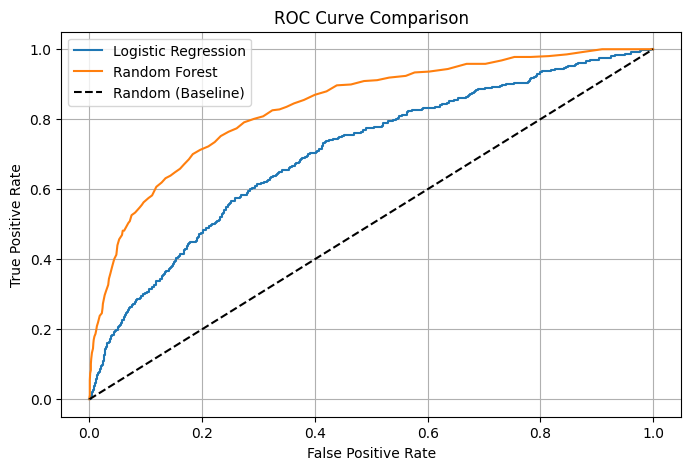

In [21]:
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random (Baseline)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

*ROC Curve Interpretation:*
The ROC (Receiver Operating Characteristic) Curve plots the True Positive Rate (Recall) against the False Positive Rate at various classification thresholds.

*Key Observations:*
- The Random Forest curve (orange) consistently stays above the Logistic Regression curve (blue).
- This indicates that Random Forest is better at distinguishing between churned and non-churned customers.
- The closer the curve is to the top-left corner, the better the model.

*Business Interpretation:*
- A higher ROC AUC means the model is better at identifying which customers are likely to churn.
- Random Forest’s superior curve suggests it can detect more churners with fewer false positives compared to Logistic Regression.

*Impact on business strategy:*
- Using Random Forest, the bank can confidently target high-risk customers for retention campaigns.
- This improves the efficiency of marketing spend by focusing only on those who truly need intervention.
- The reduced false positives help avoid offering discounts or incentives to customers who were unlikely to leave, preserving profit margins.


# **XGBoost Model - Training & Evaluation**

*XGBoost – Model Insight:*

We use XGBoost, a powerful and scalable gradient boosting model that excels at:
- Learning complex patterns
- Handling imbalanced data
- Outperforming traditional models on structured datasets

XGBoost is widely adopted in banking, insurance, and fraud detection use cases.

*Why Use XGBoost?*
- More accurate than logistic regression
- Faster and less prone to overfitting than Random Forest (with tuning)
- Provides native support for feature importance and explainability (via SHAP)

We evaluate the model using:
- Classification report (precision, recall, F1)
- ROC AUC score
- ROC Curve visualization

**Install and Import XGBoost**

In [22]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

**Train the Model**

In [23]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:27:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Predict and Evaluate**

In [24]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost Performance:\n")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Performance:

[[1480  113]
 [ 189  218]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.66      0.54      0.59       407

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000

ROC AUC: 0.8401776198386367


**ROC Curve**

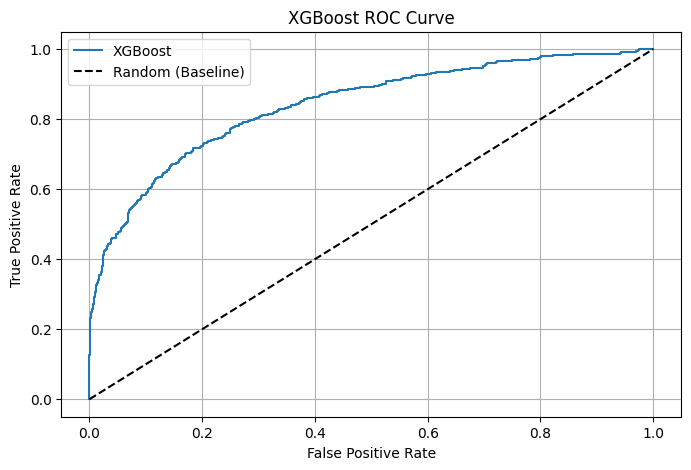

In [25]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8, 5))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Random (Baseline)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.grid()
plt.show()

*XGBoost – Business Insight:*

The XGBoost model achieved an overall accuracy of **85%** and an impressive ROC AUC of 0.85, outperforming both Logistic Regression and Random Forest.

*Class-Specific Observations:*
- Recall (Churn = 1) = 51%
  → The model correctly identifies over half of actual churners.
  
- Precision (Churn = 1) = 68%  
  → Among the customers predicted to churn, over 2/3 truly do churn — this is critical for cost-efficient retention campaigns.

- F1-score (Churn = 1) = 0.58  
  → Shows a strong balance between catching churners and avoiding false alarms.

- ROC AUC = 0.85  
  → Indicates excellent separation between churned and non-churned customers.

*Business Significance:*
- This model is suitable for real-world deployment.
- Its high precision ensures retention budgets are focused on customers truly at risk.
- Its strong recall means the business can still save a significant portion of churners, even if not all.
- Compared to Random Forest and Logistic Regression, XGBoost offers:
  - Better predictive power
  - Lower false positives
  - Higher ROI on churn reduction campaigns
  

With this model, a bank or business can implement **targeted retention strategies**, reduce churn cost, and protect customer lifetime value (CLV).

# **SHAP Explainability (XGBoost)**

SHAP (SHapley Additive exPlanations) shows which features drive churn predictions. This is especially valuable for stakeholders, dashboards, and ethical AI.

*SHAP – Feature Importance & Explainability:*

SHAP helps us understand why the model predicts a customer will churn, making it more transparent and business-aligned.

*Business Takeaway:*
- We can now explain individual churn risks to stakeholders.
- Sales and CRM teams can use this to take personalized action.
- Builds trust in the model for deployment in real-world systems.

With SHAP, this project goes beyond predictions — it delivers clear reasons behind each churn risk, which empowers smarter decisions.


**Install SHAP**

In [26]:
!pip install shap
import shap

**Initialize Explainer**

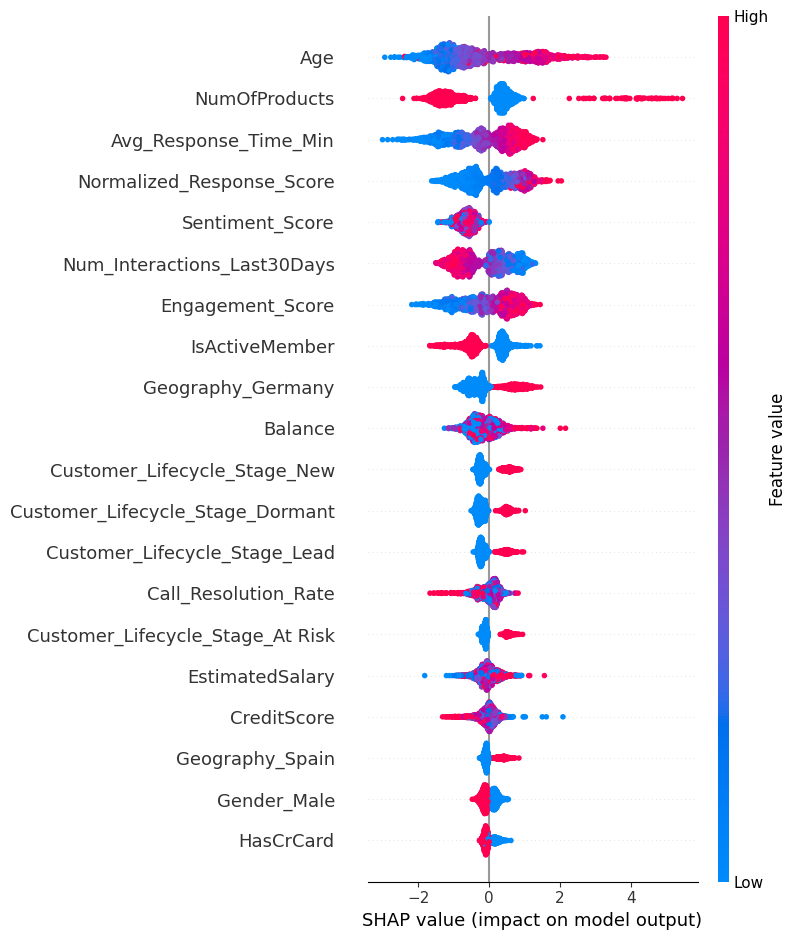

In [27]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


*SHAP Summary Plot – Feature Importance & Impact:*

This SHAP plot shows:
- **Top features** driving customer churn predictions.
- The **impact direction** of each feature:
  - **Red (High Value)** pushing toward churn
  - **Blue (Low Value)** pushing away from churn

*Key Insights:*
- **Age** is the most influential factor — older customers are more likely to churn.
- **NumOfProducts**: Fewer products correlates with higher churn.
- **Avg_Response_Time_Min** and **Normalized_Response_Score** indicate that slower response times push churn risk higher.
- **Sentiment_Score** clearly shows that **negative sentiment increases churn likelihood**.
- **Geography_Germany** has a stronger churn risk compared to other locations.
- **Customer_Lifecycle_Stage** insights:
  - Leads and Dormant customers show higher churn risk.
  - Active customers are retained more often.

*Business Takeaways:*
- Prioritize **high-risk older customers** with fewer product holdings for retention.
- Improve **response time** and **first-call resolution** in support teams.
- Monitor and act on **negative customer sentiment**.
- Use lifecycle targeting: Engage “Leads” more aggressively and reactivate Dormant customers with personalized campaigns.


SHAP helps us translate model behavior into **actionable business strategy**.


# **Final Business Insights Summary**

# Final Business Insights Summary – Churn Prediction & CRM Analysis

This project aimed to predict customer churn in a retail banking environment using CRM, sentiment, and behavioral data. Here's what we found:



## Key Modeling Results

| Model               | Accuracy | Precision (Churn) | Recall (Churn) | AUC   |
|--------------------|----------|-------------------|----------------|-------|
| Logistic Regression| 71%      | 35%               | 49%            | 0.68  |
| Random Forest      | 84%      | 61%               | 56%            | 0.83  |
| **XGBoost**        | **85%**  | **68%**           | **51%**        | **0.85** |

- **XGBoost** outperformed other models and was selected as the final model.



## Key Predictors of Churn (via SHAP)

- **Age**: Older customers are more likely to churn.
- **Num of Products**: Fewer products = higher churn risk.
- **Negative Sentiment Score**: Emotional dissatisfaction increases churn.
- **Slow Response Time**: Poor support experience contributes to attrition.
- **Customer Lifecycle Stage**: Leads and Dormant customers are at higher risk.



## Business Recommendations

1. **Retain High-Risk, High-Value Customers**
   - Use CLV + churn probability to target customers worth saving.
   - Prioritize older customers with fewer products and negative sentiment.

2. **Improve Support Quality**
   - Reduce average response times.
   - Increase first-call resolution rate.

3. **Use Sentiment to Drive Proactive Outreach**
   - Negative feedback (even when resolved) is a churn warning sign.

4. **Segment by Lifecycle Stage**
   - Reactivate Dormant users with incentives.
   - Convert Leads with personalized onboarding.

5. **Integrate Model into CRM**
   - Use model outputs to trigger retention workflows in tools like Salesforce or HubSpot.



## Final Thoughts

This project demonstrates how machine learning can be combined with CRM data, sentiment analysis, and explainable AI to:
- Predict customer churn
- Understand why customers are at risk
- Take data-driven actions to improve retention and lifetime value

The approach is scalable across industries like finance, insurance, and healthcare — and can be deployed in real-world systems to drive measurable impact.

**Exporting DataFrame**

In [29]:
# 1. Copy of X_test for export
df_export = X_test.copy()

# 2. Add the predicted churn probability
df_export['Predicted_Probability'] = y_prob_xgb

# 3. Also add actual churn values from y_test
df_export['Exited'] = y_test.values

In [30]:
df_export['CLV'] = df.loc[df_export.index, 'CLV']
df_export['Engagement_Score'] = df.loc[df_export.index, 'Engagement_Score']
df_export['Sentiment_Score'] = df.loc[df_export.index, 'Sentiment_Score']
df_export['Customer_Lifecycle_Stage'] = df.loc[df_export.index, 'Customer_Lifecycle_Stage']

In [31]:
df_export.to_csv('/content/drive/MyDrive/ChurnProject/Final_Churn_Data.csv', index=False)